In [15]:
import numpy as np
np.random.seed(3)
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('error')

In [16]:
def change_state(x, x1, x2):

    if np.array_equal(x, x1):
        return x2.copy()
    
    elif np.array_equal(x, x2):
        return x1.copy()

def get_valence_signal(x, x1, x2, R1, R2):

    if np.array_equal(x, x1):
        return R1
    elif np.array_equal(x, x2):
        return R2
    
def compute_p_change(y):

    if y<0.05:
        return 0.05
    else:
        return y

In [17]:
class Model:
    
    def __init__(self, block_threshold, tau_w=100, tau_theta=50, theta0=0.):

        self.tau_w = tau_w
        self.tau_theta = tau_theta

        self.theta = theta0

        self.block_threshold = block_threshold
    
    def get_weights_update(self, x, y, R):

        theta_dot = - 1/self.tau_theta * (self.theta - y**2)

        w_dot = -R*x*y*(y - self.theta)/self.tau_w
        
        if not self.block_threshold:
            self.theta = self.theta + theta_dot
        
        return w_dot

In [18]:
# Possible states
x1, x2 = np.array([1., 0.]), np.array([0., 1.])

# Rs
Rm = [-1, -1.5]
Rp = 1.5

# Number of steps
number_of_mice = 10
steps_phase1 = 10000
steps_phase2 = 50000

# Data Storage
data = {'sham': {x:{'phase_1': [], 'phase_2': []} for x in Rm}, 
        'aCB1KO': {x:{'phase_1': [], 'phase_2': []} for x in Rm}}

In [19]:
# Sham Mice

for mouse_id in range(number_of_mice):

    for Rm_value in Rm:
        try:

            sham_mouse = Model(block_threshold=False)

            temp_dict = {'states': [], 'rates': [], 'thetas': [], 'weights': []}
        
            # phase 1
            R1 = Rp
            R2 = Rm_value

            x = x1.copy()
            w = np.array([0.2,0.2])

            for i in tqdm(range(steps_phase1)):

                x_old = x.copy()

                y = np.dot(w, x)

                p_change = compute_p_change(y)

                if np.random.rand()< p_change:
                    
                    x = change_state(x, x1, x2)
                
                R = get_valence_signal(x, x1, x2, R1, R2)
                w += sham_mouse.get_weights_update(x_old, y, R)

                temp_dict['states'].append(x.copy())
                temp_dict['rates' ].append(y.copy())
                temp_dict['thetas'].append(sham_mouse.theta)
                temp_dict['weights'].append(w.copy())

            data['sham'][Rm_value]['phase_1'].append(temp_dict.copy())

            temp_dict = {'states': [], 'rates': [], 'thetas': [], 'weights': []}

            # Phase 2
            R1 = Rm_value
            R2 = Rp

            for i in tqdm(range(steps_phase2)):

                x_old = x.copy()

                y = np.dot(w, x)

                p_change = compute_p_change(y)

                if np.random.rand()< p_change:
                    
                    x = change_state(x, x1, x2)
                
                R = get_valence_signal(x, x1, x2, R1, R2)
                w += sham_mouse.get_weights_update(x_old, y, R)

                temp_dict['states'].append(x.copy())
                temp_dict['rates' ].append(y.copy())
                temp_dict['thetas'].append(sham_mouse.theta)
                temp_dict['weights'].append(w.copy())

            data['sham'][Rm_value]['phase_2'].append(temp_dict.copy())

        except RuntimeWarning:
            print("OVERFLOW, deleting mouse")
            continue

 13%|█▎        | 6724/50000 [00:00<00:00, 157733.87it/s]


OVERFLOW, deleting mouse


 10%|▉         | 4995/50000 [00:00<00:00, 155681.66it/s]


OVERFLOW, deleting mouse


 11%|█         | 5265/50000 [00:00<00:00, 156898.62it/s]


OVERFLOW, deleting mouse


 12%|█▏        | 6122/50000 [00:00<00:00, 158016.54it/s]


OVERFLOW, deleting mouse


100%|██████████| 50000/50000 [00:00<00:00, 137572.38it/s]


In [20]:
# aCB1KO Mice

for mouse_id in range(number_of_mice):

    for Rm_value in Rm:

        try: 
            
            aCB1KO_mouse = Model(block_threshold=True, theta0 = 0.02)

            # phase 1
            temp_dict = {'states': [], 'rates': [], 'thetas': [], 'weights': []}

            R1 = Rp
            R2 = Rm_value

            x = x1.copy()
            w = np.array([0.2,0.2])

            for i in tqdm(range(steps_phase1)):

                x_old = x.copy()

                y = np.dot(w, x)

                p_change = compute_p_change(y)

                if np.random.rand()< p_change:
                    
                    x = change_state(x, x1, x2)
                
                R = get_valence_signal(x, x1, x2, R1, R2)
                w += aCB1KO_mouse.get_weights_update(x_old, y, R)

                temp_dict['states'].append(x.copy())
                temp_dict['rates' ].append(y.copy())
                temp_dict['thetas'].append(aCB1KO_mouse.theta)
                temp_dict['weights'].append(w.copy())
            
            data['aCB1KO'][Rm_value]['phase_1'].append(temp_dict.copy())

            # Phase 2
            temp_dict = {'states': [], 'rates': [], 'thetas': [], 'weights': []}
                        
            R1 = Rm_value
            R2 = Rp
            
            for i in tqdm(range(steps_phase2)):

                x_old = x.copy()

                y = np.dot(w, x)

                p_change = compute_p_change(y)

                if np.random.rand()< p_change:
                    
                    x = change_state(x, x1, x2)
                
                R = get_valence_signal(x, x1, x2, R1, R2)
                w += aCB1KO_mouse.get_weights_update(x_old, y, R)

                temp_dict['states'].append(x.copy())
                temp_dict['rates' ].append(y.copy())
                temp_dict['thetas'].append(aCB1KO_mouse.theta)
                temp_dict['weights'].append(w.copy())

            data['aCB1KO'][Rm_value]['phase_2'].append(temp_dict.copy())

        except RuntimeWarning:

            print("FUCK")
            continue

 13%|█▎        | 6493/50000 [00:00<00:00, 144642.69it/s]


FUCK


 11%|█         | 5545/50000 [00:00<00:00, 157768.31it/s]


FUCK


  7%|▋         | 3416/50000 [00:00<00:00, 128484.95it/s]


FUCK


 11%|█         | 5368/50000 [00:00<00:00, 155343.52it/s]


FUCK


 10%|█         | 5055/50000 [00:00<00:00, 142574.18it/s]


FUCK


100%|██████████| 50000/50000 [00:00<00:00, 134823.64it/s]


In [21]:
window = 300

all_visits_x1_sham = {x:[] for x in Rm}
all_visits_x1_aCB1KO = {x:[] for x in Rm}

for Rm_value in Rm:

    number_of_mice_sham = len(data['sham'][Rm_value]['phase_1'])
    number_of_mice_KO = len(data['aCB1KO'][Rm_value]['phase_1'])

    for agent_id in range(number_of_mice_sham):

        one_hot_vec_x1_sham = np.array([x[0] for x in data['sham'][Rm_value]['phase_1'][agent_id]['states']])

        visits_x1_sham = []

        for i in range(steps_phase1-window):
            visits_x1_sham.append(one_hot_vec_x1_sham[i:i+window].mean())
        
        all_visits_x1_sham[Rm_value].append(visits_x1_sham)


    for agent_id in range(number_of_mice_KO):

        one_hot_vec_x1_aCB1KO = np.array([x[0] for x in data['aCB1KO'][Rm_value]['phase_1'][agent_id]['states']])
    
        visits_x1_aCB1KO = []

        for i in range(steps_phase1-window):
            visits_x1_aCB1KO.append(one_hot_vec_x1_aCB1KO[i:i+window].mean())
    
        all_visits_x1_aCB1KO[Rm_value].append(visits_x1_aCB1KO.copy())

average_visits_x1_sham = {x:np.mean(all_visits_x1_sham[x], axis=0) for x in Rm}

average_visits_x1_aCB1KO = {x:np.mean(all_visits_x1_aCB1KO[x], axis=0) for x in Rm}

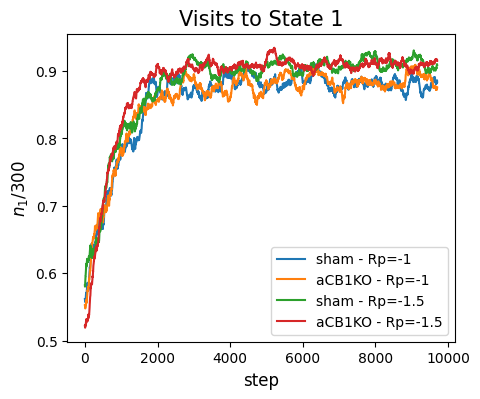

In [22]:
fig, ax = plt.subplots(figsize=(5,4))

for x in Rm:

    ax.plot(average_visits_x1_sham[x], label=f'sham - Rp={x}')
    ax.plot(average_visits_x1_aCB1KO[x], label=f'aCB1KO - Rp={x}')

ax.set_title("Visits to State 1", fontsize=15)
ax.set_xlabel('step', fontsize=12)
ax.set_ylabel('$n_1$/300', fontsize=12)
ax.legend()

#fig.savefig('phase_1_visits.pdf')

In [26]:
window = 300

all_visits_x1_sham = {x:[] for x in Rm}
all_visits_x1_aCB1KO = {x:[] for x in Rm}

for Rm_value in Rm:

    number_of_mice_sham = len(data['sham'][Rm_value]['phase_2'])
    number_of_mice_KO = len(data['aCB1KO'][Rm_value]['phase_2'])

    for agent_id in range(number_of_mice_sham):

        one_hot_vec_x1_sham = np.array([x[0] for x in data['sham'][Rm_value]['phase_2'][agent_id]['states']])

        visits_x1_sham = []

        for i in range(steps_phase2-window):
            visits_x1_sham.append(one_hot_vec_x1_sham[i:i+window].mean())
        
        all_visits_x1_sham[Rm_value].append(visits_x1_sham)


    for agent_id in range(number_of_mice_KO):

        one_hot_vec_x1_aCB1KO = np.array([x[0] for x in data['aCB1KO'][Rm_value]['phase_2'][agent_id]['states']])
    
        visits_x1_aCB1KO = []

        for i in range(steps_phase2-window):
            visits_x1_aCB1KO.append(one_hot_vec_x1_aCB1KO[i:i+window].mean())
    
        all_visits_x1_aCB1KO[Rm_value].append(visits_x1_aCB1KO.copy())

average_visits_x1_sham = {x:np.mean(all_visits_x1_sham[x], axis=0) for x in Rm}

average_visits_x1_aCB1KO = {x:np.mean(all_visits_x1_aCB1KO[x], axis=0) for x in Rm}

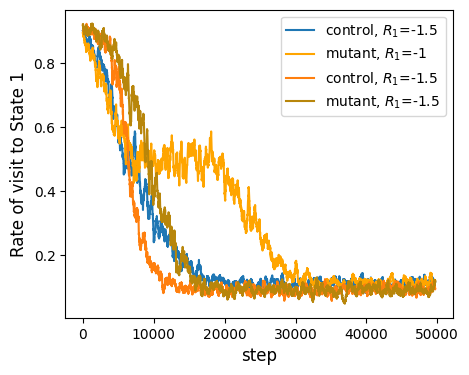

In [27]:
fig, ax = plt.subplots(figsize=(5,4))



colors = ['orange', 'darkgoldenrod', 'gold']
for i, x in enumerate(Rm):
    ax.plot(average_visits_x1_sham[x], label=f'control, $R_1$={-1.5}')
    ax.plot(average_visits_x1_aCB1KO[x], label=f'mutant, $R_1$={x}', color = colors[i])

ax.set_xlabel('step', fontsize=12)
ax.set_ylabel('Rate of visit to State 1', fontsize=12)
ax.legend()

#fig.savefig('inversion_recovery_reviewer1.pdf')

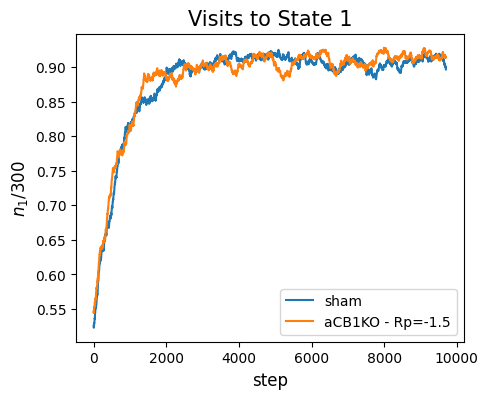

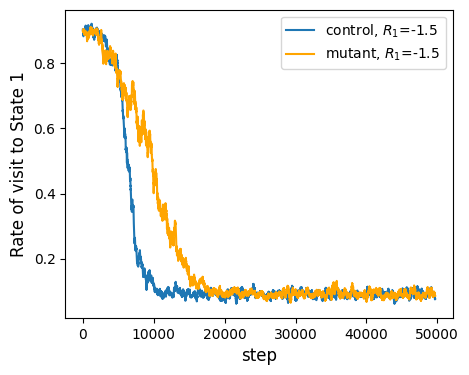

In [ ]:
######### PHASE 2
fig, ax = plt.subplots(figsize=(5,4))

number_of_mice_sham = len(data['sham']['phase_2'])

window = 300
all_visits_x1_sham = []

for agent_id in range(number_of_mice_sham):

    one_hot_vec_x1_sham = np.array([x[0] for x in data['sham']['phase_2'][agent_id]['states']])

    visits_x1_sham = []

    for i in range(steps_phase2-window):
        visits_x1_sham.append(one_hot_vec_x1_sham[i:i+window].mean())
    
    all_visits_x1_sham.append(visits_x1_sham)


all_visits_x1_aCB1KO = {x:[] for x in Rm}

for Rm_value in Rm:

    number_of_mice_KO = len(data['aCB1KO'][Rm_value]['phase_2'])

    for agent_id in range(number_of_mice_KO):

        one_hot_vec_x1_aCB1KO = np.array([x[0] for x in data['aCB1KO'][Rm_value]['phase_2'][agent_id]['states']])
    
        visits_x1_aCB1KO = []

        for i in range(steps_phase2-window):
            visits_x1_aCB1KO.append(one_hot_vec_x1_aCB1KO[i:i+window].mean())
    
        all_visits_x1_aCB1KO[Rm_value].append(visits_x1_aCB1KO)

average_visits_x1_sham = np.mean(all_visits_x1_sham, axis=0)
average_visits_x1_aCB1KO = {x:np.mean(all_visits_x1_aCB1KO[x], axis=0) for x in Rm}
    
ax.plot(average_visits_x1_sham, label=f'control, $R_1$={-1.5}')

colors = ['orange', 'darkgoldenrod', 'gold']
for i, x in enumerate(Rm):
    ax.plot(average_visits_x1_aCB1KO[x], label=f'mutant, $R_1$={x}', color = colors[i])

ax.set_xlabel('step', fontsize=12)
ax.set_ylabel('Rate of visit to State 1', fontsize=12)
ax.legend()

fig.savefig('inversion_recovery_lessnegative.pdf')